In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Loading the data

In [2]:
iris_data = pd.read_csv("C:\\Users\\dccha\\Desktop\\CODING\\Projects\\Iris\\Iris Flower - Iris.csv")
iris_data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
iris_data  = iris_data.drop(columns='Id', axis=0)

In [4]:
iris_data.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [5]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris_data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
iris_data.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

Data Visualization

Text(0.5, 1.0, 'Sepal Width with Sepal Length comparision of Iris Species')

<Figure size 2000x500 with 0 Axes>

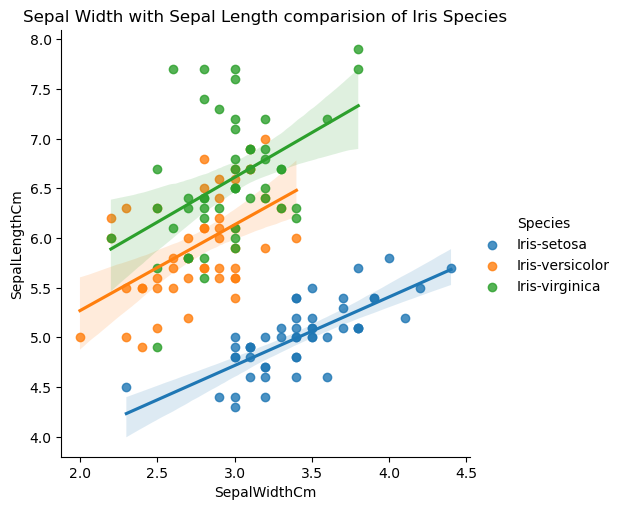

In [8]:
fig = plt.figure(figsize=(20,5))
sns.lmplot(data=iris_data, x = 'SepalWidthCm' , y = 'SepalLengthCm' , hue="Species")
plt.title("Sepal Width with Sepal Length comparision of Iris Species")

Text(0.5, 1.0, 'Petal Width (cm) with Petal Length (cm)')

<Figure size 2000x500 with 0 Axes>

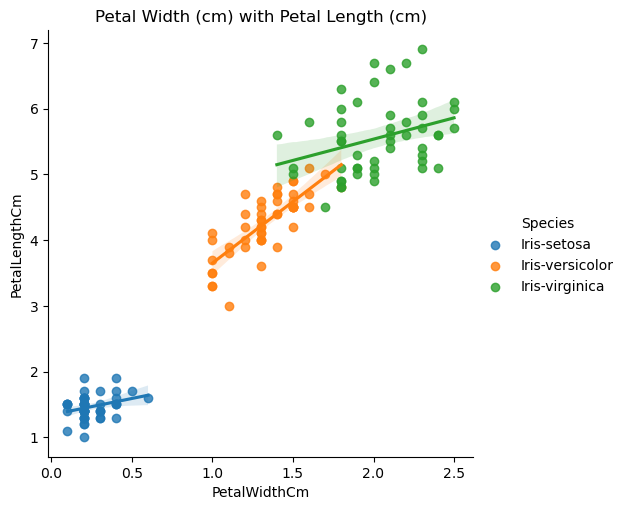

In [9]:
plt.figure(figsize=(20,5))
sns.lmplot(data=iris_data, x = 'PetalWidthCm', y = 'PetalLengthCm' , hue = 'Species')
plt.title("Petal Width (cm) with Petal Length (cm)")

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

<Figure size 2000x500 with 0 Axes>

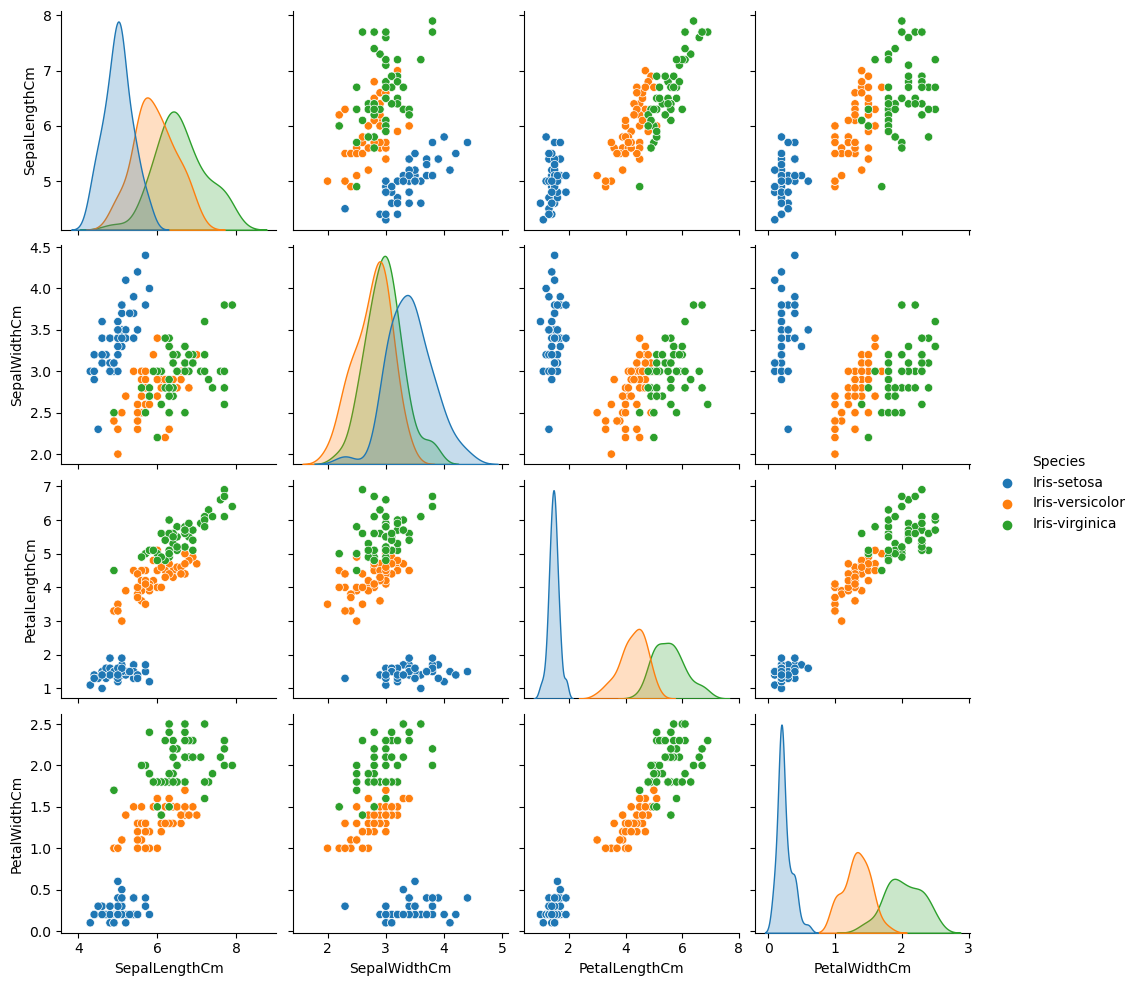

In [10]:
plt.figure(figsize=(20,5))
sns.pairplot(data = iris_data,hue="Species", diag_kind = 'kde')


In [11]:
data = iris_data.values

X = data[:,:4]
y = data[:,4]

Model 1 : Support Vector Model

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
train_X , test_X , train_y , test_y = train_test_split(X,y,test_size=0.2)

model_svm = SVC()

model_svm.fit(train_X,train_y)

SVC()

In [13]:
pred_svm = model_svm.predict(test_X)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y , pred_svm)

0.9

Model 2 : DecisionTreeClassifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

model_dtr = DecisionTreeClassifier(random_state = 0, max_depth=3)

model_dtr.fit(train_X,train_y)



DecisionTreeClassifier(max_depth=3, random_state=0)

In [16]:
pred_dtr = model_dtr.predict(test_X)

accuracy_score(test_y , pred_dtr)

0.9

Model 3 : KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [18]:
knn_model = KNeighborsClassifier(n_neighbors= 3)
knn_model.fit(train_X,train_y)

KNeighborsClassifier(n_neighbors=3)

In [19]:
knn_pred = knn_model.predict(test_X)

In [20]:
accuracy_score(test_y , knn_pred)

0.9333333333333333

Report of Model Accuracy and Precision

In [21]:
print(classification_report(test_y , knn_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



In [22]:
print(classification_report(test_y , pred_dtr))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.91      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



In [23]:
print(classification_report(test_y , pred_svm))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.91      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30

